In [1]:
from insight_analyzer import *
# notebook input from an insight
analyzer = ForecastAnalyzer(result_id="786a2236a1afa9966b765849e1ae608d2b5e434f",
                              workspace="2b2f7df9d0214f3583d0bbd49678273a")
df = analyzer.get_df()

Let's start by preprocessing our dataframe, so `Autoreg` from `sklearn` package can accept it:

In [3]:
# Convert PeriodIndex to DateTimeIndex
if isinstance(df.index, pd.PeriodIndex):
    df.index = df.index.to_timestamp()

# Prepare the data (get the time series column)
column_name = df.columns[0]
time_series = df[column_name]

Okay, now let's set up the fitted model. For this we need to set up lags, which is a parameter denoting, how many past datapoints influence the forecast of next one.

In [4]:
from statsmodels.tsa.ar_model import AutoReg

# Number of quarters to use to predict the next quarter
lags = 8 # 2 years

# Train the AutoRegressive model
model = AutoReg(time_series, lags=lags)
model_fitted = model.fit()

Now let's forecast our data.

In [5]:
# Number of steps to predict
steps = 12 # 3 years

# Confidence interval:
conf_int = 90

forecast_obj = model_fitted.get_prediction(start=len(time_series), end=len(time_series) + steps - 1)
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int(alpha=(100-conf_int)/100)

It is better to concise the data, so it would be easier to work with.

In [6]:
result_df = pd.DataFrame({
        "forecast": forecast,
        "lower_bound": conf_int.iloc[:, 0],
        "upper_bound": conf_int.iloc[:, 1]
    })

Okay, now just plot it.
Notice, that the last of the original datapoints is not connected to the new one.

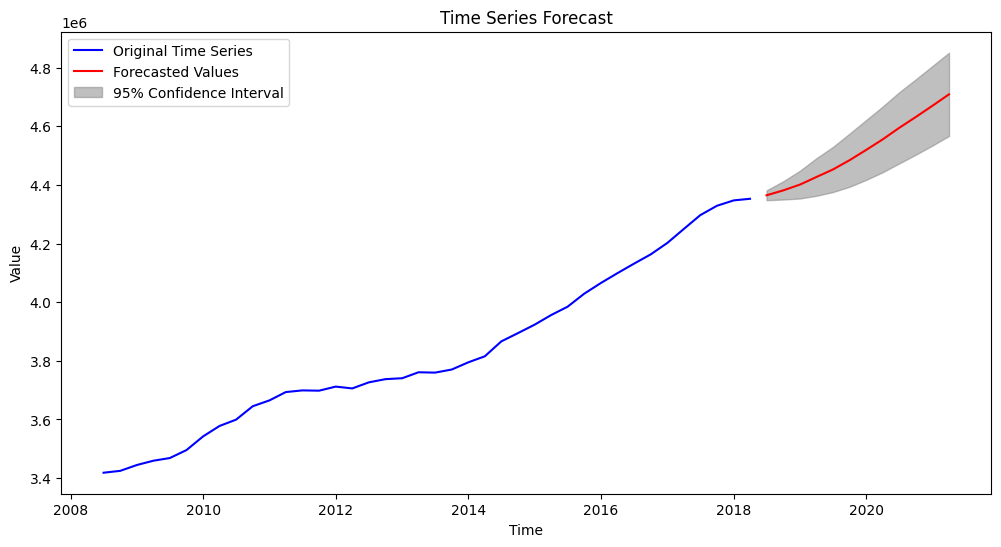

In [7]:
column_name = df.columns[0]

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[column_name], label='Original Time Series', color='blue')

# Plot the forecasted values
plt.plot(result_df.index, result_df['forecast'], label='Forecasted Values', color='red')

# Plot the confidence intervals
plt.fill_between(result_df.index, result_df['lower_bound'], result_df['upper_bound'], color='gray', alpha=0.5, label='95% Confidence Interval')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecast')
plt.legend()

# Show plot
plt.show()

To fix this gap, simply add the last datapoint point of the original dataframe to the new one.

In [8]:
# Adding the last point of the input dataframe to the result dataframe
last_value = time_series.iloc[-1]
last_date = time_series.index[-1]
new_row = pd.DataFrame({
    "forecast": [last_value],
    "lower_bound": [last_value],
    "upper_bound": [last_value]
}, index=[last_date])

# Append the new row at the beginning of the result dataframe
result_df = pd.concat([new_row, result_df])

Now let's see how it looks when connected.

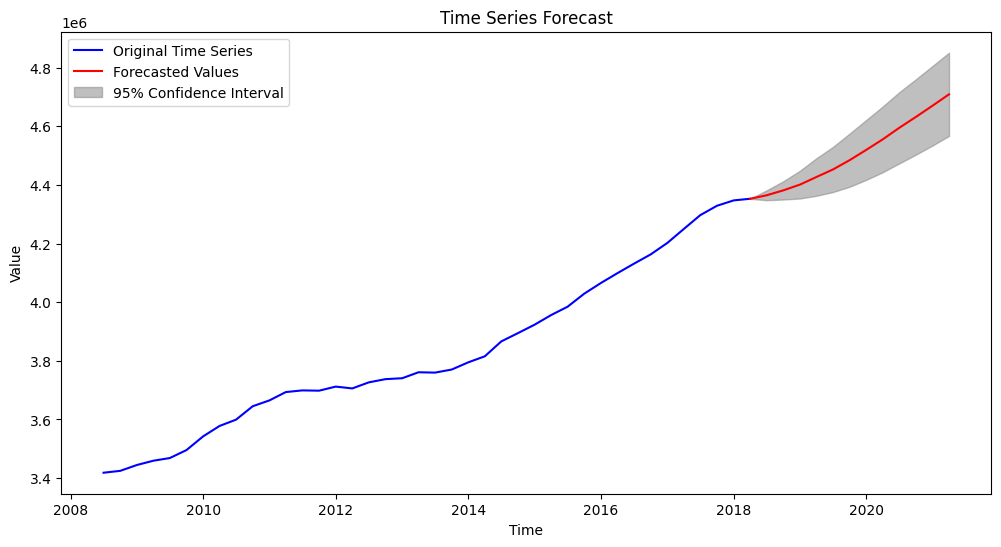

In [9]:
column_name = df.columns[0]

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[column_name], label='Original Time Series', color='blue')

# Plot the forecasted values
plt.plot(result_df.index, result_df['forecast'], label='Forecasted Values', color='red')

# Plot the confidence intervals
plt.fill_between(result_df.index, result_df['lower_bound'], result_df['upper_bound'], color='gray', alpha=0.5, label='95% Confidence Interval')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecast')
plt.legend()

# Show plot
plt.show()

Awesome! Last thing to do now is to push it to the server, so we can see it on our dashboard.

In [10]:
analyzer.push_to_server(result_df, df)

{"attribute": ["2008-07-01 00:00:00", "2008-10-01 00:00:00", "2009-01-01 00:00:00", "2009-04-01 00:00:00", "2009-07-01 00:00:00", "2009-10-01 00:00:00", "2010-01-01 00:00:00", "2010-04-01 00:00:00", "2010-07-01 00:00:00", "2010-10-01 00:00:00", "2011-01-01 00:00:00", "2011-04-01 00:00:00", "2011-07-01 00:00:00", "2011-10-01 00:00:00", "2012-01-01 00:00:00", "2012-04-01 00:00:00", "2012-07-01 00:00:00", "2012-10-01 00:00:00", "2013-01-01 00:00:00", "2013-04-01 00:00:00", "2013-07-01 00:00:00", "2013-10-01 00:00:00", "2014-01-01 00:00:00", "2014-04-01 00:00:00", "2014-07-01 00:00:00", "2014-10-01 00:00:00", "2015-01-01 00:00:00", "2015-04-01 00:00:00", "2015-07-01 00:00:00", "2015-10-01 00:00:00", "2016-01-01 00:00:00", "2016-04-01 00:00:00", "2016-07-01 00:00:00", "2016-10-01 00:00:00", "2017-01-01 00:00:00", "2017-04-01 00:00:00", "2017-07-01 00:00:00", "2017-10-01 00:00:00", "2018-01-01 00:00:00", "2018-04-01 00:00:00", "2018-07-01 00:00:00", "2018-10-01 00:00:00", "2019-01-01 00:00:0